In [1]:
### IMPORTING PACAKGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
file_path = 'C:/Data_set/'

In [3]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

In [4]:
## importing data

customer_acqusition = pd.read_csv(file_path+'Customer Acqusition.csv')
spend_tran_data = pd.read_csv(file_path+'spend.csv')
Repayment = pd.read_csv(file_path+'Repayment.csv')
Credit_Card_Data = pd.read_excel(file_path+'Credit Card Data.xlsx')

### Data Inspection of customer_acqusition

In [5]:
customer_acqusition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [6]:
customer_acqusition.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment'],
      dtype='object')

In [7]:
customer_acqusition.drop(columns='No', inplace=True)

In [8]:
customer_acqusition

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [9]:
customer_acqusition.shape

(100, 7)

In [10]:
customer_acqusition.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

### Data Inspection of spend_tran_data

In [11]:
spend_tran_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [12]:
spend_tran_data.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [13]:
spend_tran_data.shape

(1500, 5)

In [14]:
spend_tran_data.columns

Index(['Sl No:', 'Customer', 'Month', 'Type', 'Amount'], dtype='object')

In [15]:
spend_tran_data.drop(columns='Sl No:', inplace=True)

In [16]:
spend_tran_data.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [17]:
spend_tran_data['Month']=pd.to_datetime(spend_tran_data.Month, format = '%d-%b-%y')
spend_tran_data

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07
...,...,...,...,...
1495,A67,2006-02-04,BUS TICKET,356872.73
1496,A68,2006-03-25,BUS TICKET,204971.10
1497,A69,2006-03-31,BUS TICKET,50449.44
1498,A70,2006-03-23,BUS TICKET,80593.94


### Data Inspection of Repayment

In [18]:
Repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [19]:
Repayment.isnull().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [20]:
Repayment.notnull().sum()


SL No:        1499
Customer      1500
Month         1500
Amount        1500
Unnamed: 4       0
dtype: int64

In [21]:
Repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


### Dropping the NaN values as missing value imputation is not suggested in these circumstances, and it seems that Repayment data contains additional observations.

In [22]:
Repayment.dropna(axis = 0, how='all', inplace=True)

In [23]:
Repayment.dropna(axis = 1, how='all', inplace=True)

In [24]:
Repayment.drop(columns='SL No:', inplace=True)

In [25]:
Repayment['Month']=pd.to_datetime(Repayment.Month, format = '%d-%b-%y')

In [26]:
Repayment

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88
...,...,...,...
1495,A67,2005-05-09,55638.77
1496,A68,2006-05-10,319836.49
1497,A69,2006-07-11,247628.45
1498,A70,2005-08-12,454016.51


### Data Inspection of Credit_Card_Data

In [27]:
Credit_Card_Data ### same data as customer_acqusition

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,35.855817,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,27.356821,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,22.021249,BANGALORE,Platimum,10002,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,71.083162,CHENNAI,Silver,100000,C19,Salaried_Pvt
96,97,A97,69.880658,TRIVANDRUM,Platimum,10000,C20,Govt
97,98,A98,20.951811,CALCUTTA,Platimum,10001,C21,Normal Salary
98,99,A99,52.456908,CALCUTTA,Platimum,10002,C22,Self Employed


## Q1

### A

In [28]:
customer_acqusition[customer_acqusition.Age<18]

,Customer,Age,City,Product,Limit,Company,Segment
13,A14,16,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,A41,13,COCHIN,Platimum,500000.0,C23,Govt
62,A63,15,BANGALORE,Gold,500000.0,C25,Self Employed
67,A68,12,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,A70,16,BOMBAY,Platimum,10001.0,C32,Self Employed
89,A90,16,COCHIN,Gold,500000.0,C13,Govt


In [29]:
(customer_acqusition.Age<18).sum()

6

In [30]:
round((customer_acqusition.Age.mean()),0)

46.0

In [31]:
customer_acqusition['Age'] = np.where(customer_acqusition.Age<18, round((customer_acqusition.Age.mean()),0), customer_acqusition.Age )

In [32]:
customer_acqusition[customer_acqusition.Age==46]

,Customer,Age,City,Product,Limit,Company,Segment
13,A14,46.0,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,A41,46.0,COCHIN,Platimum,500000.0,C23,Govt
53,A54,46.0,COCHIN,Platimum,500000.0,C16,Normal Salary
62,A63,46.0,BANGALORE,Gold,500000.0,C25,Self Employed
67,A68,46.0,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,A70,46.0,BOMBAY,Platimum,10001.0,C32,Self Employed
89,A90,46.0,COCHIN,Gold,500000.0,C13,Govt


In [33]:
round((customer_acqusition.Age.mean()),0) ### AFTER REPLACING NEW MEAN AGE

48.0

### B

In [34]:
customer_acqusition

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [35]:
customer_spend_df = pd.merge(left = customer_acqusition, right=spend_tran_data, 
                             how ='inner', left_on='Customer', right_on='Customer')

In [36]:
customer_spend_df.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [37]:
customer_spend_df[customer_spend_df.Amount>customer_spend_df.Limit].head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,199554.72
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-28,TRAIN TICKET,376887.49
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-04-06,BUS TICKET,439648.53
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-11-23,PETRO,384078.73
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-09-03,JEWELLERY,117089.16


In [38]:
customer_spend_df['Amount'] = np.where(customer_spend_df.Amount>customer_spend_df.Limit, 
                                       customer_spend_df.Limit*0.5, customer_spend_df.Amount )

In [39]:
customer_spend_df[customer_spend_df.Customer=='A2'].head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,50000.0
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-28,TRAIN TICKET,50000.0
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-04-06,BUS TICKET,50000.0
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-11-23,PETRO,50000.0
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-09-03,JEWELLERY,50000.0


### C

In [40]:
customer_acqusition.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [41]:
Repayment.head(2)

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02


In [42]:
customer_repayment = pd.merge(left=customer_acqusition, right=Repayment, how='inner', left_on='Customer', right_on='Customer')

In [43]:
customer_repayment

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,25682.73


In [44]:
customer_repayment.rename(columns={'Amount': 'Repayment_Amount'}, inplace=True)

In [45]:
customer_repayment[customer_repayment.Repayment_Amount>customer_repayment.Limit]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repayment_Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,185955.07
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-28,412783.34
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-04-06,148038.67
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-11-23,179144.68
23,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-08-03,381635.66
...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,2006-03-30,462283.02
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57


In [46]:
customer_repayment['Repayment_Amount']=np.where(customer_repayment.Repayment_Amount>customer_repayment.Limit,
        customer_repayment.Limit, customer_repayment.Repayment_Amount )

In [47]:
customer_repayment.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repayment_Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


## 2

### A

In [48]:
print('Num_distinct_Customer:', customer_acqusition.Customer.nunique())

Num_distinct_Customer: 100


### B

In [49]:
print('Num_distinct_Category:', customer_acqusition.Product.nunique())

Num_distinct_Category: 3


### C

### after replacing spend_amonut with 50% of limit

In [50]:
customer_spend_df['month'] = customer_spend_df.Month.dt.month

In [51]:
customer_spend_df['year'] = customer_spend_df.Month.dt.year

In [52]:
customer_spend_df

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,month,year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,1,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,1,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,1,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,1,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,1,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,1,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,1,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,1,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,1,2004


In [53]:
customer_spend_df[customer_spend_df.month==4]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,month,year
9,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-19,AIR TICKET,346925.68,4,2006
14,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-02,TRAIN TICKET,176372.82,4,2006
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-04-06,BUS TICKET,50000.00,4,2004
25,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2006-04-03,RENTAL,50000.00,4,2006
31,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,2005-04-27,TRAIN TICKET,5000.00,4,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
1441,A62,39.0,BOMBAY,Gold,500000.0,C24,Normal Salary,2004-04-25,SHOPPING,222806.33,4,2004
1488,A89,72.0,CALCUTTA,Gold,500000.0,C12,Govt,2006-04-01,JEWELLERY,24972.02,4,2006
1489,A90,46.0,COCHIN,Gold,500000.0,C13,Govt,2006-04-02,PETRO,264882.27,4,2006
1490,A91,41.0,BOMBAY,Gold,500000.0,C14,Govt,2006-04-03,CLOTHES,89951.84,4,2006


In [54]:
monthly_spend = pd.DataFrame(customer_spend_df.groupby(
    ['year','month'])['Amount'].mean()).reset_index()

In [55]:
monthly_spend

,year,month,Amount
0,2004,1,144233.915179
1,2004,2,136998.280000
2,2004,3,133708.090714
3,2004,4,124621.976429
4,2004,5,153326.954286
5,2004,9,171579.263571
6,2004,11,79642.078571
7,2005,1,192271.670714
8,2005,2,154334.423869
9,2005,4,146430.918929


In [56]:
monthly_spend = pd.DataFrame(monthly_spend.groupby('month')['Amount'].sum()).round(2)
monthly_spend

,Amount
month,
1,472818.10
2,439811.69
3,265428.38
4,405796.60
5,451646.44
6,346697.97
7,309891.77
8,355571.35
9,423395.11


### befor replacing spend_amonut with 50% of limit

In [57]:
spend_tran_data['month'] = spend_tran_data.Month.dt.month

In [58]:
spend_tran_data['year'] = spend_tran_data.Month.dt.year

In [59]:
monthly_spend_ = pd.DataFrame(spend_tran_data.groupby(
                ['year','month'])['Amount'].mean()).reset_index()

In [60]:
pd.DataFrame(monthly_spend_.groupby('month')['Amount'].sum())

,Amount
month,
1,826511.447950
2,704875.810536
3,479312.203940
4,719922.331125
5,699398.492214
6,439940.499286
7,516621.762500
8,474434.351429
9,658109.676429


### D

### after replacing Repayment_Amount with limit

In [61]:
customer_repayment['month'] = customer_repayment.Month.dt.month

In [62]:
customer_repayment['year'] = customer_repayment.Month.dt.year

In [63]:
customer_repayment[customer_repayment.month==3]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repayment_Amount,month,year
47,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt,2006-03-25,10001.0,3,2006
58,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,2006-03-31,10002.0,3,2006
61,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,2006-03-25,10002.0,3,2006
66,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,2006-03-29,10002.0,3,2006
75,A6,70.0,DELHI,Silver,100000.0,C6,Self Employed,2006-03-23,100000.0,3,2006
...,...,...,...,...,...,...,...,...,...,...,...
1483,A84,70.0,PATNA,Silver,100000.0,C7,Govt,2006-03-27,100000.0,3,2006
1484,A85,59.0,CHENNAI,Silver,100001.0,C8,Govt,2006-03-28,100001.0,3,2006
1485,A86,25.0,TRIVANDRUM,Silver,100002.0,C9,Govt,2006-03-29,100002.0,3,2006
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,2006-03-30,100003.0,3,2006


In [64]:
monthly_repay = pd.DataFrame(customer_repayment.groupby(
                ['year', 'month'])['Repayment_Amount'].mean()).reset_index()

In [65]:
pd.DataFrame(monthly_repay.groupby('month')['Repayment_Amount'].sum())

,Repayment_Amount
month,
1,545654.290905
2,471167.464349
3,332629.898196
4,477325.431556
5,522702.565266
6,262481.445833
7,320097.709144
8,311537.602365
9,391510.553125


### befor replacing Repayment_Amount with limit

In [66]:
Repayment['month']= Repayment.Month.dt.month

In [67]:
Repayment['year']= Repayment.Month.dt.year

In [68]:
monthly_repayment = pd.DataFrame(Repayment.groupby(['year', 'month'])['Amount'].mean()).reset_index()

In [69]:
pd.DataFrame(monthly_repayment.groupby('month')['Amount'].sum())

,Amount
month,
1,777513.137101
2,780021.460992
3,493436.547480
4,747302.562222
5,746290.973600
6,462190.271667
7,497807.862410
8,488574.914122
9,694721.899583


### E

#### merging customer repayment and customer spend df as these transaction amounts are updated as needed, assuming that the company would seek profit based on the updated/new data

In [70]:
customer_repayment.tail()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repayment_Amount,month,year
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00,1,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00,1,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00,1,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00,1,2004
1499,A100,36.0,COCHIN,Silver,100000.0,C5,Salaried_MNC,2004-01-25,69551.19,1,2004


In [71]:
customer_spend_df

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,month,year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,1,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,1,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,1,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,1,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,1,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,1,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,1,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,1,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,1,2004


In [72]:
customer_spend_repayment = pd.merge(left=customer_repayment, right=customer_spend_df, how='inner', 
         on=['Customer', 'Age', 'City', 'Product', 'Limit', 'Company', 'Segment', 'Month', 'month',
             'year'])

In [73]:
customer_spend_repayment.insert(loc=13, column='total_profit', 
                                value=((customer_spend_repayment.Repayment_Amount - customer_spend_repayment.Amount)*0.029))

In [74]:
monthly_profit=pd.DataFrame(customer_spend_repayment.groupby(['year', 'month'])['total_profit'].sum()).reset_index()

In [75]:
monthly_profit=monthly_profit[monthly_profit.total_profit>0]

In [76]:
monthly_profit=pd.DataFrame(monthly_profit.groupby('month')['total_profit'].sum())

In [77]:
monthly_profit

,total_profit
month,
1,167178.88883
2,75988.59386
3,19371.44726
4,53037.44982
5,142149.65699
6,6513.58473
7,20484.56586
8,435.34800
9,15751.55996


### F

In [78]:
pd.DataFrame(customer_spend_df.groupby('Type')['Amount'].sum()).reset_index().sort_values(by='Amount', ascending=False).head(5).reset_index(drop=True)

,Type,Amount
0,PETRO,28597384.98
1,CAMERA,27690738.44
2,FOOD,20519243.60
3,AIR TICKET,20155847.12
4,TRAIN TICKET,19995825.72


### G

In [79]:
city_wise_max_spend = (pd.DataFrame(customer_spend_df.groupby('City')['Amount'].sum()).reset_index())
city_wise_max_spend.sort_values(by='Amount', ascending=False).reset_index(drop=True).head(1)


,City,Amount
0,COCHIN,45963513.5


### H

In [80]:
customer_spend_age=customer_spend_df.copy()

In [81]:
customer_spend_age['Age_group']=pd.cut(customer_spend_age.Age, bins=10, labels=['18.94-25-Teen', '26-31, youth', '32-37, Adult 1', '38-43, Adult 2', '44-49, Adult 3', '50-55, Adult 4', '56-61, Adult 5', '62-67, seniors 1', '68-73,seniors 2', '74-79,seniors 3'])

In [82]:
age_group_wise_spend=pd.DataFrame(customer_spend_age.groupby('Age_group')['Amount'].sum()).reset_index()

In [83]:
age_group_wise_spend.sort_values(by='Amount', ascending=False).head(1).reset_index(drop=True)

,Age_group,Amount
0,"44-49, Adult 3",39907148.99


### I

In [84]:
repayment_cust = pd.DataFrame(customer_repayment.groupby('Customer')['Repayment_Amount'].sum()).reset_index()

In [85]:
repayment_cust.sort_values(by='Repayment_Amount', ascending=False).reset_index(drop=True).head(1)

,Customer,Repayment_Amount
0,A61,10539142.91


## 3

In [86]:
city_wise_spend=pd.DataFrame(customer_spend_df.groupby(['City','year','Product'])['Amount'].sum()).reset_index()

In [87]:
city_wise_spend=city_wise_spend.pivot(index=['City','year'], columns='Product', values='Amount')

In [88]:
city_wise_spend

Product                 Gold    Platimum      Silver
City       year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

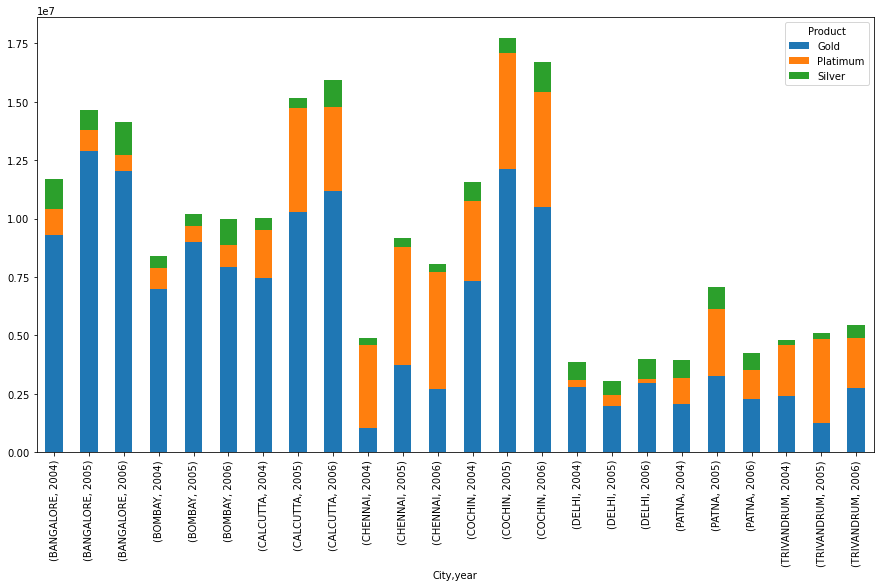

In [89]:
city_wise_spend.plot(kind='bar', stacked=True ,figsize = (15,8))
plt.show()

### 4

### A

In [90]:
monthly_spend_city=pd.DataFrame(customer_spend_df.groupby(['City', 'month'])['Amount'].sum()).reset_index()

In [91]:
monthly_spend_city=monthly_spend_city.pivot(index='City', columns='month', values='Amount')

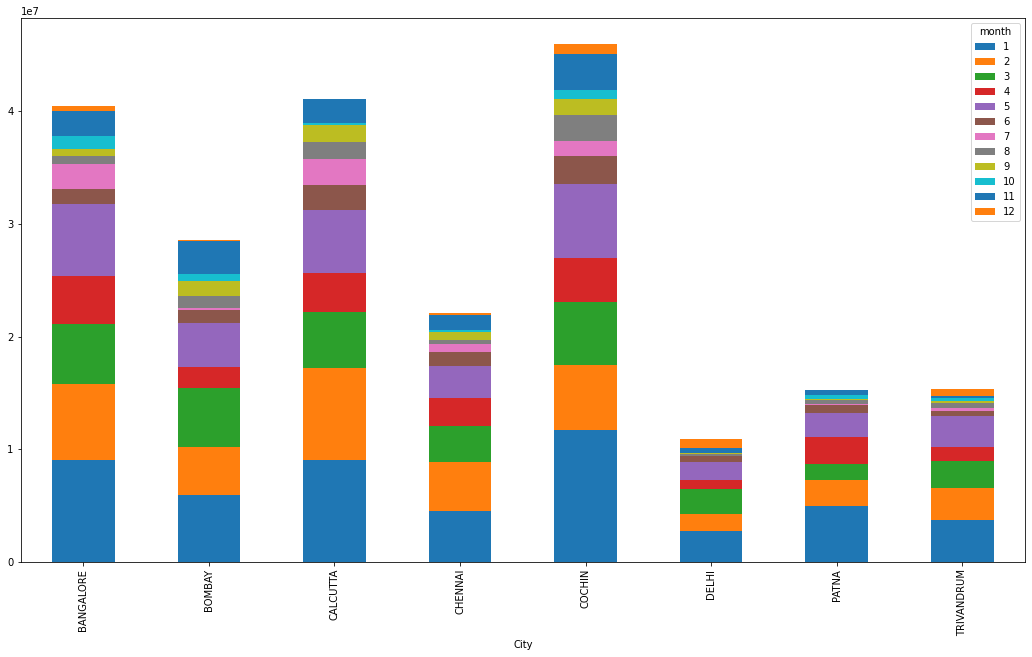

In [92]:
monthly_spend_city.plot(kind='bar',stacked=True , figsize = (18,10))
plt.show()

### B

In [93]:
air_tic=customer_spend_df[customer_spend_df.Type=='AIR TICKET']

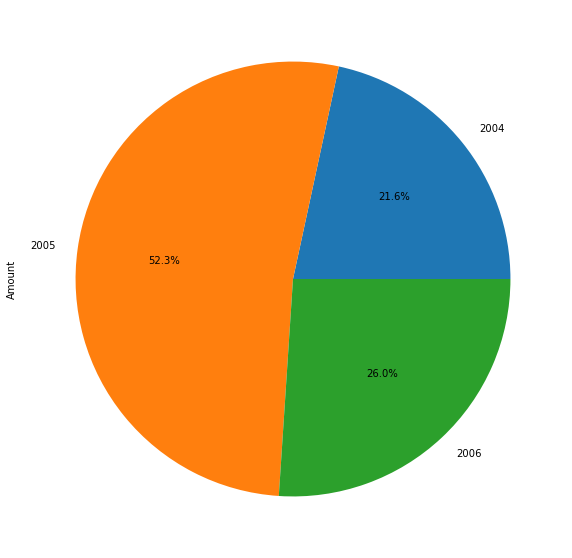

In [94]:
(air_tic.groupby('year')['Amount'].sum()).plot(kind='pie', autopct="%.1f%%", figsize = (18,10))
plt.show()

In [95]:
air_tic=pd.DataFrame(air_tic.groupby('year')['Amount'].sum()).reset_index()

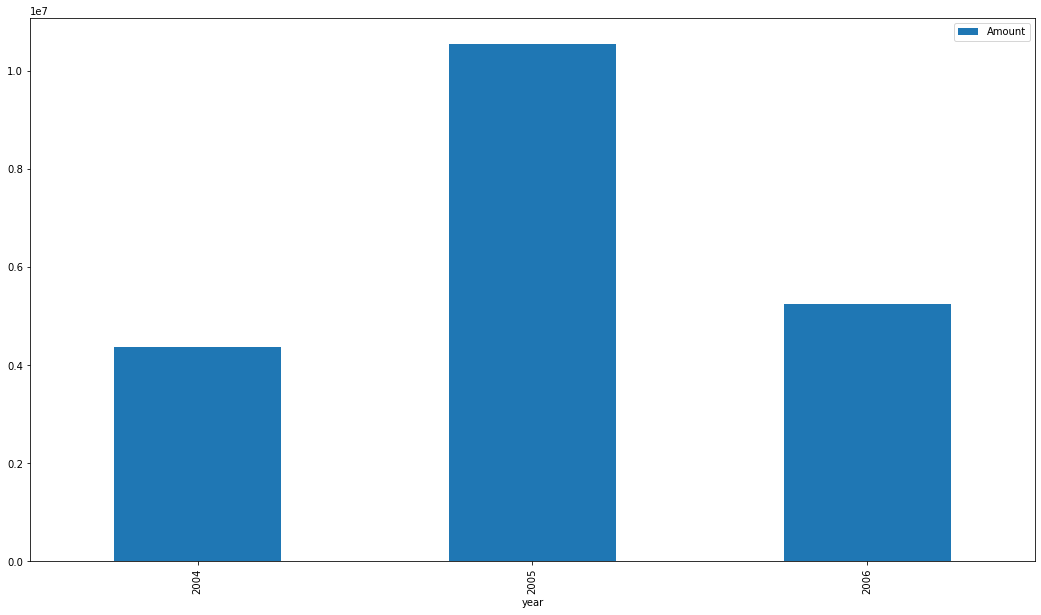

In [96]:
air_tic.plot(kind='bar', x='year', y='Amount',  figsize = (18,10))
plt.show()

### C

In [97]:
monthly_spend_product=pd.DataFrame(customer_spend_df.groupby(['year','month','Product'])['Amount'].sum()).reset_index()

In [98]:
monthly_spend_product=pd.DataFrame(monthly_spend_product.groupby(['month','Product'])['Amount'].sum()).reset_index()

In [99]:
monthly_spend_product=monthly_spend_product.pivot(index='Product', columns = 'month' , values='Amount')

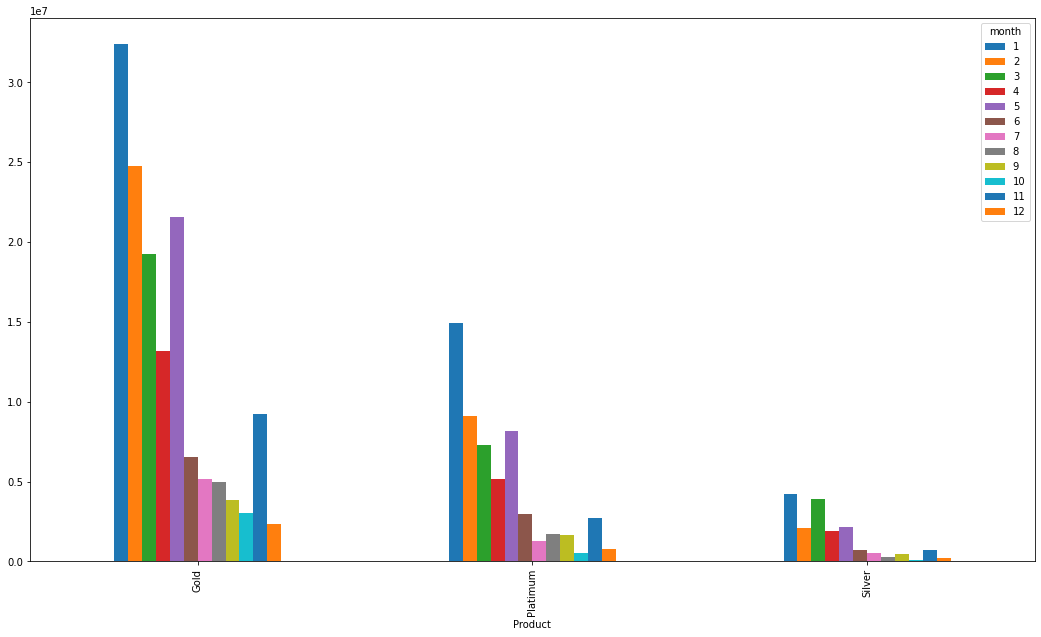

In [100]:
monthly_spend_product.plot(kind = 'bar',  figsize = (18,10))
plt.show()

### According to the data provided, sales are high between the months of January and May. Seasonality is found for all products during these months.

### 5. 
You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [101]:
#### first point Top 10 customer regarding repayment amt by product and year 

In [102]:
customer_repayment_udf = customer_repayment.copy()

In [103]:
customer_repayment_udf.rename(columns={'month':'monthly', 'year':'yearly'}, inplace=True)

In [104]:
customer_repayment_udf.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repayment_Amount,monthly,yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,1,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,1,2004


In [105]:
def top_ten_customer(product, time_period):
    return pd.DataFrame(customer_repayment_udf[customer_repayment_udf.Product==product].groupby(
        ['City','Customer','Product', time_period])
        ['Repayment_Amount'].sum().reset_index().sort_values(by='Repayment_Amount', 
        ascending=False)).pivot(index=['Product', 'City' , 'Customer'], 
        columns=time_period, values='Repayment_Amount')
    

In [106]:
top_ten_customer('Gold','yearly')

yearly                             2004        2005        2006
Product City       Customer                                    
Gold    BANGALORE  A1        2359797.84  1529158.77   864735.06
                   A13       2337012.77  3757673.00  3477314.89
                   A14       2770261.30  2491981.61  2681025.72
                   A30        978777.17  2667746.38  2486958.41
                   A43       1906497.47  4006956.60  2576417.39
                   A63        788855.60         NaN   211117.12
                   A81              NaN         NaN   207780.32
                   A88              NaN         NaN   146821.30
                   A92              NaN         NaN   459105.69
        BOMBAY     A12       2339080.90  2877588.30  3118090.96
                   A17       1425448.02   731143.83  3127783.14
                   A42       3045914.71  3125758.43  1443787.72
                   A62       1744114.25  1541617.21  1684085.69
                   A91              NaN         NaN   247781.00
        CALCUTTA   A10        892190.53  1246843.93  1556613.06
                   A15       1051502.61  1720768.79  2783141.43
                   A29       1376793.94  1706779.22  3434298.00
                   A31        407599.13  1448641.71  1527798.41
                   A60       2890721.81  3742856.10  3242712.83
                   A89              NaN         NaN   497237.97
        CHENNAI    A27       1842823.04  2782591.71  2387485.81
                   A67         67845.60    55638.77         NaN
        COCHIN     A11        958556.39  2045470.88  2306906.76
                   A16       1122211.16  1226247.16  1911369.63
                   A32        344312.67   696673.46  1517308.65
                   A45       2557947.39  4042447.57  1847939.91
                   A61       2518154.95  4276860.55  3744127.41
                   A65        468922.60   230667.34         NaN
                   A90              NaN         NaN   109931.32
                   A94        153465.89         NaN         NaN
        DELHI      A44       2149383.50  4165317.77  1430028.85
                   A64              NaN         NaN   323229.09
                   A82              NaN         NaN   342200.74
                   A93        342326.14         NaN         NaN
        PATNA      A26       1490427.84  2433837.95  3330421.30
                   A66        477039.78         NaN   113094.58
                   A95        369405.96         NaN         NaN
        TRIVANDRUM A28        965108.49  2827009.82  3376614.65